In [2]:
# Load necessary packages
import os
import math
import numpy as np
import pandas as pd
from numpy import inf
import matplotlib.pyplot as plt
from sklearn import preprocessing, pipeline, model_selection
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, learning_curve
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# import data

file_path = '../data/descriptorsOE_ALog_Dragon.csv'
data = pd.read_csv(file_path)
# data = data.dropna(subset=['Set'])
# data = data.drop(columns=['IUPAC Name'], errors='ignore')
data.set_index('SMILES', inplace=True)
data.head()



/var/folders/ql/72jgfybd7vl7kl40rt_fl0gh0000gn/T/ipykernel_22859/2837751695.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,activity,Set,CASRN,EXTERNALID,N,NAME,ARTICLEID,PUBMEDID,PAGE,TABLE,...,Se1C1N3pd:(OEstate),Se1C1N2d:(OEstate),Se1C1C2t:(OEstate),Se1C2N2dd:(OEstate),Se1C2N==sd:(OEstate),SddSi:(OEstate),Se2O1Si2d:(OEstate),Se1B3C3sa:(OEstate),Se1N3pO1a:(OEstate),SeaC2N3paa:(OEstate)
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1(C)[C@@H]2C[C@H]1C(=C)CC2,12.3,Train,-,-,-,-,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,94.1,Train,-,-,-,-,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCCCCCCCCCCCCC(=O)OCC(O)CO,38.1,Train,-,-,-,-,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCCCCCCCC\C=C\CC1CC(=O)OC1=O,98.4,Train,-,-,-,-,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCC\C=C\C=O,52.2,Train,-,-,-,-,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(1499, 5636)

In [5]:
duplicates = data[data.index.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [activity, Set, CASRN, EXTERNALID, N, NAME, ARTICLEID, PUBMEDID, PAGE, TABLE, ERROR, ALogPS_logP, ALogPS_logS, MW:(Dragon7), AMW:(Dragon7), Sv:(Dragon7), Se:(Dragon7), Sp:(Dragon7), Si:(Dragon7), Mv:(Dragon7), Me:(Dragon7), Mp:(Dragon7), Mi:(Dragon7), GD:(Dragon7), nAT:(Dragon7), nSK:(Dragon7), nTA:(Dragon7), nBT:(Dragon7), nBO:(Dragon7), nBM:(Dragon7), SCBO:(Dragon7), RBN:(Dragon7), RBF:(Dragon7), nDB:(Dragon7), nTB:(Dragon7), nAB:(Dragon7), nH:(Dragon7), nC:(Dragon7), nN:(Dragon7), nO:(Dragon7), nP:(Dragon7), nS:(Dragon7), nF:(Dragon7), nCL:(Dragon7), nBR:(Dragon7), nI:(Dragon7), nB:(Dragon7), nHM:(Dragon7), nHet:(Dragon7), nX:(Dragon7), H%:(Dragon7), C%:(Dragon7), N%:(Dragon7), O%:(Dragon7), X%:(Dragon7), nCsp3:(Dragon7), nCsp2:(Dragon7), nCsp:(Dragon7), nStructures:(Dragon7), totalcharge:(Dragon7), nCIC:(Dragon7), nCIR:(Dragon7), TRS:(Dragon7), Rperim:(Dragon7), Rbrid:(Dragon7), MCD:(Dragon7), RFD:(Dragon7), RCI:(Dragon7), NRS:(Dragon7), NNRS:(Dragon7), nR0

In [6]:
# Remove variables with all missing values or non-numerical
initial_data_shape = data.shape
data = data.dropna(axis=1, how='all')


data = data.select_dtypes(include=[int, float])

final_features_after_cleaning = data.shape

initial_data_shape, final_features_after_cleaning, data.head()


((1499, 5636),
 (1499, 5626),
                                              activity  ALogPS_logP  \
 SMILES                                                               
 CC1(C)[C@@H]2C[C@H]1C(=C)CC2                     12.3         3.94   
 COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1      94.1         5.13   
 CCCCCCCCCCCCCC(=O)OCC(O)CO                       38.1         4.77   
 CCCCCCCCC\C=C\CC1CC(=O)OC1=O                     98.4         5.68   
 CCC\C=C\C=O                                      52.2         1.80   
 
                                              ALogPS_logS  MW:(Dragon7)  \
 SMILES                                                                   
 CC1(C)[C@@H]2C[C@H]1C(=C)CC2                       -3.33        136.30   
 COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1        -5.40        341.20   
 CCCCCCCCCCCCCC(=O)OCC(O)CO                         -4.09        302.50   
 CCCCCCCCC\C=C\CC1CC(=O)OC1=O                       -5.73        266.40   
 CCC\C=C\C=O         

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the new dataset
file_path = '../data/descriptorsOE_ALog_Dragon.csv'
data_set = pd.read_csv(file_path, usecols=['SMILES', 'Set'])

# Merge the Set column into the main data
data = data.merge(data_set, on='SMILES', how='left')

print(data.shape)

# Set SMILES as the index
data = data.set_index('SMILES')

/var/folders/ql/72jgfybd7vl7kl40rt_fl0gh0000gn/T/ipykernel_22859/4259925944.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv(file_path, usecols=['SMILES', 'Set'])


(1499, 5628)


In [8]:
data.head()

,activity,ALogPS_logP,ALogPS_logS,MW:(Dragon7),AMW:(Dragon7),Sv:(Dragon7),Se:(Dragon7),Sp:(Dragon7),Si:(Dragon7),Mv:(Dragon7),...,Se1C1N2d:(OEstate),Se1C1C2t:(OEstate),Se1C2N2dd:(OEstate),Se1C2N==sd:(OEstate),SddSi:(OEstate),Se2O1Si2d:(OEstate),Se1B3C3sa:(OEstate),Se1N3pO1a:(OEstate),SeaC2N3paa:(OEstate),Set
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1(C)[C@@H]2C[C@H]1C(=C)CC2,12.3,3.94,-3.33,136.30,5.241,14.210,25.07,16.09,29.32,0.547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,94.1,5.13,-5.40,341.20,9.478,24.730,37.03,25.62,40.05,0.687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
CCCCCCCCCCCCCC(=O)OCC(O)CO,38.1,4.77,-4.09,302.50,5.500,28.820,54.33,31.76,62.90,0.524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
CCCCCCCCC\C=C\CC1CC(=O)OC1=O,98.4,5.68,-5.73,266.40,5.920,24.990,44.47,27.26,51.03,0.555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
CCC\C=C\C=O,52.2,1.80,-1.49,98.16,5.774,9.349,16.75,10.26,19.28,0.550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train


In [9]:
training_data = data[data['Set'] == 'Train']
testing_data = data[data['Set'] == 'leaderboard']
validation_data = data[data['Set'].isna()]

In [10]:
# Drop the Set column after splitting
training_data = training_data.drop(columns=['Set'])
testing_data = testing_data.drop(columns=['Set'])
validation_data = validation_data.drop(columns=['Set'])

# Split training and testing data into features and target variable
X_train = training_data.drop(columns=['activity'])
y_train = training_data['activity']

X_val = validation_data.drop(columns=['activity'])
y_val = validation_data['activity']

X_test = testing_data.drop(columns=['activity'])
y_test = testing_data['activity']

In [11]:
print(training_data.shape)
print(testing_data.shape)
print(validation_data.shape)

(1001, 5626)
(199, 5626)
(299, 5626)


In [12]:
print(X_train.shape)

(1001, 5625)


In [13]:
X_train.head()

,ALogPS_logP,ALogPS_logS,MW:(Dragon7),AMW:(Dragon7),Sv:(Dragon7),Se:(Dragon7),Sp:(Dragon7),Si:(Dragon7),Mv:(Dragon7),Me:(Dragon7),...,Se1C1N3pd:(OEstate),Se1C1N2d:(OEstate),Se1C1C2t:(OEstate),Se1C2N2dd:(OEstate),Se1C2N==sd:(OEstate),SddSi:(OEstate),Se2O1Si2d:(OEstate),Se1B3C3sa:(OEstate),Se1N3pO1a:(OEstate),SeaC2N3paa:(OEstate)
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1(C)[C@@H]2C[C@H]1C(=C)CC2,3.94,-3.33,136.30,5.241,14.210,25.07,16.09,29.32,0.547,0.964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,5.13,-5.40,341.20,9.478,24.730,37.03,25.62,40.05,0.687,1.028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCCCCCCCCCCCCC(=O)OCC(O)CO,4.77,-4.09,302.50,5.500,28.820,54.33,31.76,62.90,0.524,0.988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCCCCCCCC\C=C\CC1CC(=O)OC1=O,5.68,-5.73,266.40,5.920,24.990,44.47,27.26,51.03,0.555,0.988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCC\C=C\C=O,1.80,-1.49,98.16,5.774,9.349,16.75,10.26,19.28,0.550,0.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Remove highly correlated features from the training set
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
X_train_uncorrelated = X_train.drop(columns=to_drop)

# Final features after correlation removal
final_features_after_correlation_removal = X_train_uncorrelated.shape

print("After correlation removal:", final_features_after_correlation_removal)
print(X_train_uncorrelated.head())

After correlation removal: (1001, 3519)
                                             ALogPS_logP  ALogPS_logS  \
SMILES                                                                  
CC1(C)[C@@H]2C[C@H]1C(=C)CC2                        3.94        -3.33   
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1         5.13        -5.40   
CCCCCCCCCCCCCC(=O)OCC(O)CO                          4.77        -4.09   
CCCCCCCCC\C=C\CC1CC(=O)OC1=O                        5.68        -5.73   
CCC\C=C\C=O                                         1.80        -1.49   

                                             MW:(Dragon7)  AMW:(Dragon7)  \
SMILES                                                                     
CC1(C)[C@@H]2C[C@H]1C(=C)CC2                       136.30          5.241   
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1        341.20          9.478   
CCCCCCCCCCCCCC(=O)OCC(O)CO                         302.50          5.500   
CCCCCCCCC\C=C\CC1CC(=O)OC1=O                       266.40          5

In [15]:
# Apply Mutual Information-Based Feature Selection
ig = mutual_info_regression(X_train_uncorrelated, y_train)
mutual_info = pd.Series(ig)
mutual_info.index = X_train_uncorrelated.columns
mutual_info.sort_values(ascending=False, inplace=True)


perc = 0.7
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=perc)
selected_top_columns.fit(X_train_uncorrelated.fillna(0), y_train)
sorted_features = X_train_uncorrelated.columns[selected_top_columns.get_support()]

X_train = X_train_uncorrelated[sorted_features]
X_test = X_test[sorted_features]
X_val = X_val[sorted_features]
# X_val_selected = validation_data[sorted_features]

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
validation_data = pd.concat([X_val,y_val], axis=1)

# val_data = X_val_selected.copy()

final_features_after_selection = X_train.shape

print("Final features after selection:", final_features_after_selection)
print(train_data.head())

Final features after selection: (1001, 25)
                                             ALogPS_logS  Mi:(Dragon7)  \
SMILES                                                                   
CC1(C)[C@@H]2C[C@H]1C(=C)CC2                       -3.33         1.128   
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1        -5.40         1.112   
CCCCCCCCCCCCCC(=O)OCC(O)CO                         -4.09         1.144   
CCCCCCCCC\C=C\CC1CC(=O)OC1=O                       -5.73         1.134   
CCC\C=C\C=O                                        -1.49         1.134   

                                             nBM:(Dragon7)  PCR:(Dragon7)  \
SMILES                                                                      
CC1(C)[C@@H]2C[C@H]1C(=C)CC2                             1          1.034   
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1             13          1.358   
CCCCCCCCCCCCCC(=O)OCC(O)CO                               1          1.015   
CCCCCCCCC\C=C\CC1CC(=O)OC1=O                         

In [16]:
# # Step 1: Extract feature importances
# feature_importances = best_gbr.feature_importances_

# # Step 2: Create a DataFrame for feature names and their importances
# feature_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importances
# })

# # Step 3: Sort features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# feature_importance_df.to_csv('feature_importances.csv', index=False)

# print("Feature importances have been saved to 'feature_importances.csv'")

In [17]:
# file_path = 'C:/Users/zth3/OneDrive - CDC/QSAR_TOX24/data_for_wining_team/jupyter_notebook/feature_importances.csv'
# feature_importance_df = pd.read_csv(file_path)

In [18]:
# # whether or not has NaN
# print("NaN in feature_importance_df:", feature_importance_df['Feature'].isna().sum())

In [19]:
# # Print column with NAN
# nan_row = feature_importance_df[feature_importance_df['Feature'].isna()]
# print("Row(s) with NaN in 'Feature':")
# print(nan_row)


In [20]:
# feature_importance_df = pd.read_csv('feature_importances.csv', na_values=[], keep_default_na=False)


In [21]:
# top_features = feature_importance_df['Feature'].head(20).tolist()
# top_features

In [22]:
# X_train = X_train[top_features]
# X_test = X_test[top_features]

In [23]:
print("Columns in X_train_filtered:")
print(X_train.columns)

Columns in X_train_filtered:
Index(['ALogPS_logS', 'Mi:(Dragon7)', 'nBM:(Dragon7)', 'PCR:(Dragon7)',
       'VE2_Dz(Z):(Dragon7)', 'VR2_Dz(Z):(Dragon7)', 'SpDiam_B(m):(Dragon7)',
       'EE_B(m):(Dragon7)', 'AVS_B(v):(Dragon7)', 'SpPosA_B(v):(Dragon7)',
       'SpMax_B(v):(Dragon7)', 'SpPosA_B(p):(Dragon7)', 'SpMax_B(p):(Dragon7)',
       'EE_B(s):(Dragon7)', 'GATS1i:(Dragon7)', 'SpMax1_Bh(v):(Dragon7)',
       'SpMax4_Bh(s):(Dragon7)', 'SpMin1_Bh(e):(Dragon7)',
       'SpMax_EA(bo):(Dragon7)', 'TDB01v:(Dragon7)', 'TDB03v:(Dragon7)',
       'Uc:(Dragon7)', 'MLOGP:(Dragon7)', 'ALOGP:(Dragon7)',
       'ALOGP2:(Dragon7)'],
      dtype='object')


In [24]:
# Features diff
columns_X_old = [
    'GATS1i:(Dragon7)', 'P_VSA_MR_5:(Dragon7)', 'Eig12_EA(bo):(Dragon7)', 'Eig13_EA(bo):(Dragon7)', 'Eig14_EA(bo):(Dragon7)',
    'Eig15_EA(bo):(Dragon7)', 'DISPm:(Dragon7)', 'DISPs:(Dragon7)', 'TDB04v:(Dragon7)', 'TDB09e:(Dragon7)', 'Mor26m:(Dragon7)',
    'Mor06s:(Dragon7)', 'Mor16s:(Dragon7)', 'Mor23s:(Dragon7)', 'Ku:(Dragon7)', 'nArOH:(Dragon7)', 'nSO3OH:(Dragon7)', 'C-006:(Dragon7)', 'C-026:(Dragon7)',
    'O-057:(Dragon7)', 'NsssCH:(Dragon7)', 'CATS2D_08_NL:(Dragon7)', 'B06[C-S]:(Dragon7)', 'B08[C-O]:(Dragon7)', 'B08[C-S]:(Dragon7)',
    'ALOGP:(Dragon7)', 'DLS_02:(Dragon7)'
]

columns_X_new = [
        'ALogPS_logS', 'Mi:(Dragon7)', 'nBM:(Dragon7)', 'PCR:(Dragon7)',
       'VE2_Dz(Z):(Dragon7)', 'VR2_Dz(Z):(Dragon7)', 'SpDiam_B(m):(Dragon7)',
       'EE_B(m):(Dragon7)', 'AVS_B(v):(Dragon7)', 'SpPosA_B(v):(Dragon7)',
       'SpMax_B(v):(Dragon7)', 'SpPosA_B(p):(Dragon7)', 'SpMax_B(p):(Dragon7)',
       'EE_B(s):(Dragon7)', 'GATS1i:(Dragon7)', 'SpMax1_Bh(v):(Dragon7)',
       'SpMax4_Bh(s):(Dragon7)', 'SpMin1_Bh(e):(Dragon7)',
       'SpMax_EA(bo):(Dragon7)', 'TDB01v:(Dragon7)', 'TDB03v:(Dragon7)',
       'Uc:(Dragon7)', 'MLOGP:(Dragon7)', 'ALOGP:(Dragon7)',
       'ALOGP2:(Dragon7)'
]

set_X_old = set(columns_X_old)
set_X_new = set(columns_X_new)

diff_in_X = set_X_old - set_X_new
print("Columns in X_old but not in X_new:", diff_in_X)

diff_in_X_filtered = set_X_new - set_X_old
print("Columns in X_new but not in X_new:", diff_in_X_filtered)

common_columns = set_X_old & set_X_new
print("Columns in both ", common_columns )

Columns in X_old but not in X_new: {'TDB09e:(Dragon7)', 'Mor16s:(Dragon7)', 'Eig13_EA(bo):(Dragon7)', 'P_VSA_MR_5:(Dragon7)', 'Mor23s:(Dragon7)', 'Mor06s:(Dragon7)', 'O-057:(Dragon7)', 'nArOH:(Dragon7)', 'DISPs:(Dragon7)', 'NsssCH:(Dragon7)', 'Eig12_EA(bo):(Dragon7)', 'B08[C-O]:(Dragon7)', 'C-006:(Dragon7)', 'Eig14_EA(bo):(Dragon7)', 'C-026:(Dragon7)', 'Mor26m:(Dragon7)', 'Ku:(Dragon7)', 'Eig15_EA(bo):(Dragon7)', 'DLS_02:(Dragon7)', 'DISPm:(Dragon7)', 'nSO3OH:(Dragon7)', 'CATS2D_08_NL:(Dragon7)', 'B08[C-S]:(Dragon7)', 'B06[C-S]:(Dragon7)', 'TDB04v:(Dragon7)'}
Columns in X_new but not in X_new: {'VR2_Dz(Z):(Dragon7)', 'Uc:(Dragon7)', 'MLOGP:(Dragon7)', 'SpMin1_Bh(e):(Dragon7)', 'TDB01v:(Dragon7)', 'EE_B(s):(Dragon7)', 'SpDiam_B(m):(Dragon7)', 'ALogPS_logS', 'AVS_B(v):(Dragon7)', 'SpMax1_Bh(v):(Dragon7)', 'SpMax_EA(bo):(Dragon7)', 'SpMax_B(v):(Dragon7)', 'SpPosA_B(p):(Dragon7)', 'ALOGP2:(Dragon7)', 'SpMax_B(p):(Dragon7)', 'SpMax4_Bh(s):(Dragon7)', 'VE2_Dz(Z):(Dragon7)', 'TDB03v:(Dragon7)

In [25]:
# # Save data after feature selections
# X_train['activity'] = y_train
# X_train.to_csv('Train_processed.csv', index=False)

# X_test['activity'] = y_test
# X_test.to_csv('Test_processed.csv', index=False)

# # X_val.to_csv('Val_processed.csv', index=False)

# print("Dataset saved into these files:\n")
# print("X_train_processed.csv")
# print("X_test_processed.csv")
# # print("X_val_processed.csv")



In [26]:
# # Load processed training data
# train_data = pd.read_csv('Train_processed.csv')
# X_train = train_data.drop(columns=['activity'])
# y_train = train_data['activity']

# # Load processed testing data
# test_data = pd.read_csv('Test_processed.csv')
# X_test = test_data.drop(columns=['activity'])
# y_test = test_data['activity']

# # Load validation data
# # X_val = pd.read_csv('Val_processed.csv')


In [27]:
# Data Normalization
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_val_normalized = scaler.transform(X_val)  

print(X_train_normalized)
print(X_test_normalized)
# print(X_val_normalized)

[[-0.07683496 -0.12988965 -1.00257354 ...  0.54147999  0.04885524
  -0.2479078 ]
 [-1.14390877 -0.50317383  1.11430348 ...  0.70166076  1.02853379
   0.80046494]
 [-0.46861085  0.24339452 -1.00257354 ...  0.78343136  0.86556894
   0.58816372]
 ...
 [-0.12838442 -0.19988044  0.40867781 ...  0.2222386   0.19906632
  -0.12269471]
 [-0.75213288 -0.31653174  1.46711632 ...  0.68261829  0.48390054
   0.15017292]
 [ 0.38195523 -0.26987122 -1.00257354 ... -1.23507034 -0.62614989
  -0.65089759]]
[[ 0.12420793 -0.12988965 -1.00257354 ...  0.54147999  0.0233477
  -0.26786284]
 [ 0.18606729 -0.31653174  0.23227139 ... -0.13004707  0.04885524
  -0.24765278]
 [-0.9789505   0.15007348 -0.82616712 ...  0.79799325  1.31053384
   1.20402852]
 ...
 [ 0.71702672  0.24339452 -1.00257354 ... -0.19445542 -0.04703422
  -0.32084251]
 [ 0.11389804  0.17340374 -1.00257354 ... -0.07403981  0.27181005
  -0.05766551]
 [-0.7212032  -0.03656861  2.52555483 ...  0.81983608  0.66198097
   0.34398545]]


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the RandomForestRegressor model (without fitting)
forest = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [ 200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_normalized, y_train)

best_forest = grid_search.best_estimator_

y_pred_forest = best_forest.predict(X_test_normalized)

mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

y_train_pred_forest = best_forest.predict(X_train_normalized)
train_mse_forest = mean_squared_error(y_train, y_train_pred_forest)
train_rmse_forest = np.sqrt(train_mse_forest)
train_r2_forest = r2_score(y_train, y_train_pred_forest)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test set Mean Squared Error: {mse_forest}")
print(f"Test set Root Mean Squared Error (RMSE): {rmse_forest}")
print(f"Test set Mean Absolute Error (MAE): {mae_forest}")
print(f"Test set R² Score: {r2_forest}")
print(f"Training set Mean Squared Error (MSE): {train_mse_forest}")
print(f"Training set Root Mean Squared Error (RMSE): {train_rmse_forest}")
print(f"Training set R² Score: {train_r2_forest}")

best_cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
best_cv_mse = -best_cv_results['mean_test_score'][best_index]
best_cv_rmse = np.sqrt(best_cv_mse)

print(f"Best Cross-Validation Mean Squared Error (MSE): {best_cv_mse}")
print(f"Best Cross-Validation Root Mean Squared Error (RMSE): {best_cv_rmse}")


Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test set Mean Squared Error: 510.0709159462243
Test set Root Mean Squared Error (RMSE): 22.58474963213505
Test set Mean Absolute Error (MAE): 17.289215183319058
Test set R² Score: 0.5377613516029793
Training set Mean Squared Error (MSE): 87.7812622536634
Training set Root Mean Squared Error (RMSE): 9.369165504657467
Training set R² Score: 0.9339138033136106
Best Cross-Validation Mean Squared Error (MSE): 660.7381930435919
Best Cross-Validation Root Mean Squared Error (RMSE): 25.704828204903293


In [29]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the Lasso model
lasso = linear_model.Lasso(max_iter=10000)

param_grid = {'alpha': [ 0.1, 1, 4, 10, 100]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_normalized, y_train)

best_lasso = grid_search.best_estimator_

y_pred_lasso = best_lasso.predict(X_test_normalized)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

y_train_pred_lasso = best_lasso.predict(X_train_normalized)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

print(f"Best Lasso alpha: {grid_search.best_params_['alpha']}")
print(f"Lasso Test set Mean Squared Error: {mse_lasso}")
print(f"Lasso Test set Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso Test set Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Test set R² Score: {r2_lasso}")
print(f"Lasso Training set Mean Squared Error (MSE): {train_mse_lasso}")
print(f"Lasso Training set Root Mean Squared Error (RMSE): {train_rmse_lasso}")
print(f"Lasso Training set R² Score: {train_r2_lasso}")

# Print Cross-validation results for the best model
best_cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
best_cv_mse = -best_cv_results['mean_test_score'][best_index]
best_cv_rmse = np.sqrt(best_cv_mse)

print(f"Best Cross-Validation Mean Squared Error (MSE): {best_cv_mse}")
print(f"Best Cross-Validation Root Mean Squared Error (RMSE): {best_cv_rmse}")


Best Lasso alpha: 1
Lasso Test set Mean Squared Error: 777.4494077953735
Lasso Test set Root Mean Squared Error (RMSE): 27.882779771668634
Lasso Test set Mean Absolute Error (MAE): 22.657998591740327
Lasso Test set R² Score: 0.2954564704208994
Lasso Training set Mean Squared Error (MSE): 956.4993312808472
Lasso Training set Root Mean Squared Error (RMSE): 30.92732337724762
Lasso Training set R² Score: 0.2798986786637607
Best Cross-Validation Mean Squared Error (MSE): 996.3294240623625
Best Cross-Validation Root Mean Squared Error (RMSE): 31.564686345065468


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.6, 0.8]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_normalized, y_train)

best_gbr = grid_search.best_estimator_

y_pred_gbr = best_gbr.predict(X_test_normalized)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

y_train_pred_gbr = best_gbr.predict(X_train_normalized)
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_rmse_gbr = np.sqrt(train_mse_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test set Mean Squared Error: {mse_gbr}")
print(f"Test set Root Mean Squared Error (RMSE): {rmse_gbr}")
print(f"Test set Mean Absolute Error (MAE): {mae_gbr}")
print(f"Test set R² Score: {r2_gbr}")
print(f"Training set Mean Squared Error (MSE): {train_mse_gbr}")
print(f"Training set Root Mean Squared Error (RMSE): {train_rmse_gbr}")
print(f"Training set R² Score: {train_r2_gbr}")

best_cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
best_cv_mse = -best_cv_results['mean_test_score'][best_index]
best_cv_rmse = np.sqrt(best_cv_mse)

print(f"Best Cross-Validation Mean Squared Error (MSE): {best_cv_mse}")
print(f"Best Cross-Validation Root Mean Squared Error (RMSE): {best_cv_rmse}")


Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.6}
Test set Mean Squared Error: 480.86352854923905
Test set Root Mean Squared Error (RMSE): 21.928600697473588
Test set Mean Absolute Error (MAE): 16.621408799762868
Test set R² Score: 0.5642297952086014
Training set Mean Squared Error (MSE): 161.9262819157137
Training set Root Mean Squared Error (RMSE): 12.725025811986146
Training set R² Score: 0.8780936632643261
Best Cross-Validation Mean Squared Error (MSE): 656.1617800880617
Best Cross-Validation Root Mean Squared Error (RMSE): 25.615654980657077


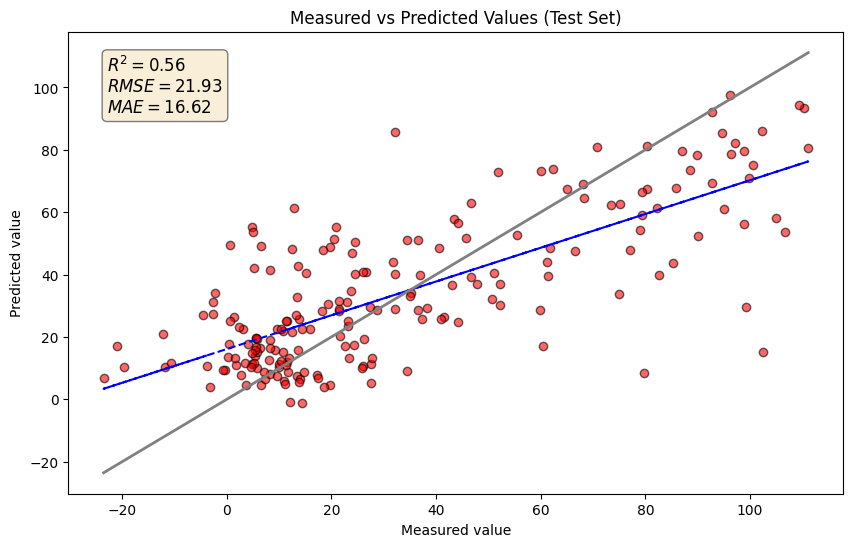

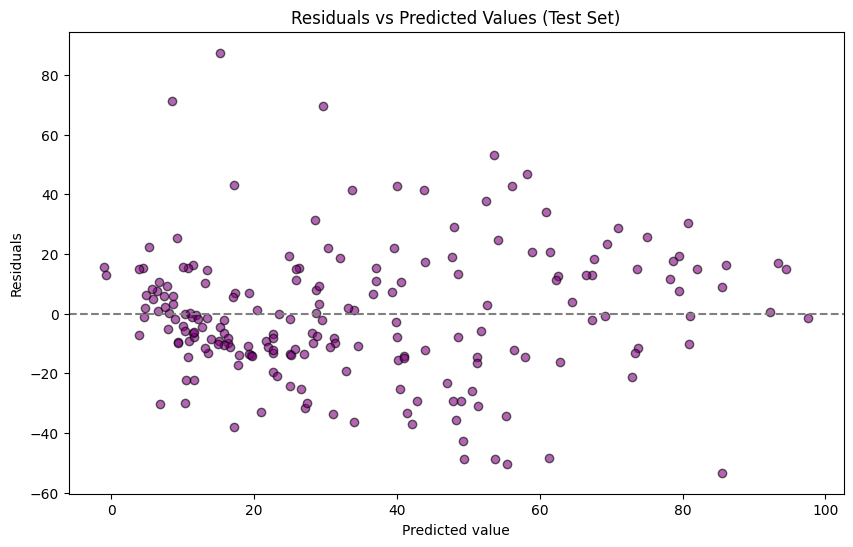

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of the true vs. predicted values (for test set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='red', edgecolor='k', alpha=0.6)

# Plot the line of best fit for the predicted vs actual
p = np.polyfit(y_test, y_pred_gbr, 1)
plt.plot(y_test, np.polyval(p, y_test), color='blue', linestyle='--')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linewidth=2)

plt.xlabel('Measured value')
plt.ylabel('Predicted value')

textstr = '\n'.join((
    f'$R^2={r2_gbr:.2f}$',
    f'$RMSE={rmse_gbr:.2f}$',
    f'$MAE={mae_gbr:.2f}$'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.title('Measured vs Predicted Values (Test Set)')

plt.show()

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_gbr
plt.scatter(y_pred_gbr, residuals, color='purple', edgecolor='k', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('Predicted value')
plt.ylabel('Residuals')

plt.title('Residuals vs Predicted Values (Test Set)')

plt.show()


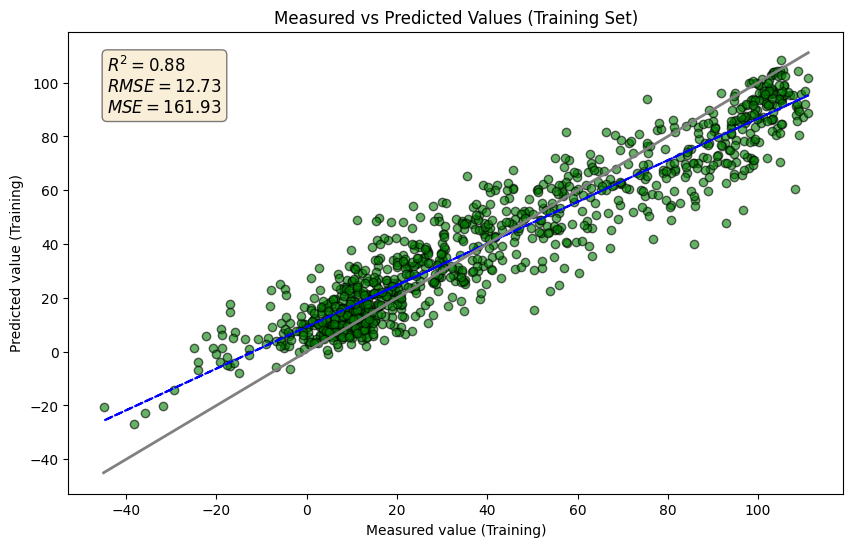

In [32]:
# Create a scatter plot of the true vs. predicted values (for training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_gbr, color='green', edgecolor='k', alpha=0.6)

# Plot the line of best fit for the predicted vs actual (training set)
p_train = np.polyfit(y_train, y_train_pred_gbr, 1)
plt.plot(y_train, np.polyval(p_train, y_train), color='blue', linestyle='--')

# Plot the line y = x (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linewidth=2)

plt.xlabel('Measured value (Training)')
plt.ylabel('Predicted value (Training)')

# Assuming you have already calculated the R², RMSE, and MAE for the training set
textstr_train = '\n'.join((
    f'$R^2={train_r2_gbr:.2f}$',
    f'$RMSE={train_rmse_gbr:.2f}$',
    f'$MSE={train_mse_gbr:.2f}$'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Position the text box on the plot
plt.text(0.05, 0.95, textstr_train, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.title('Measured vs Predicted Values (Training Set)')

# Display the plot
plt.show()


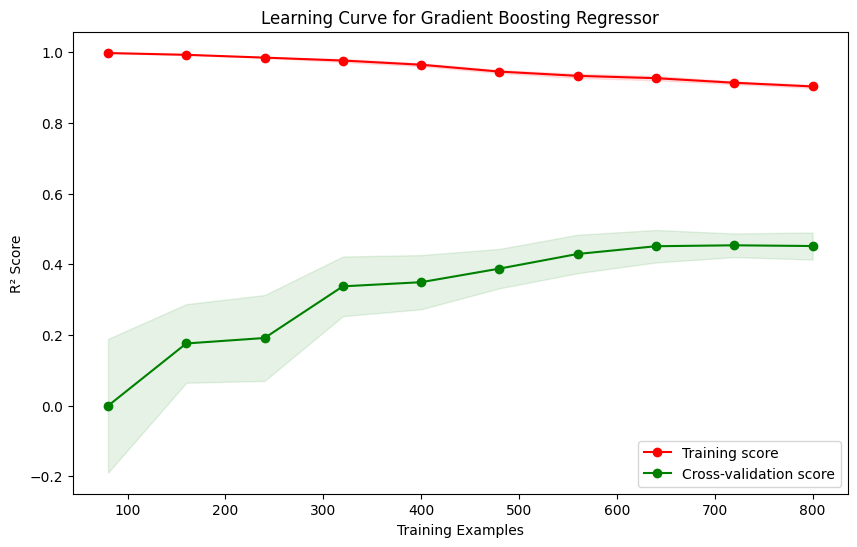

In [33]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_gbr, X_train_normalized, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Compute mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for Gradient Boosting Regressor')
plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.legend(loc="best")

plt.show()


Top 10 most important features:
                   Feature  Importance
23         ALOGP:(Dragon7)    0.093775
10    SpMax_B(v):(Dragon7)    0.073610
3            PCR:(Dragon7)    0.073332
13       EE_B(s):(Dragon7)    0.070542
14        GATS1i:(Dragon7)    0.060813
5      VR2_Dz(Z):(Dragon7)    0.057835
18  SpMax_EA(bo):(Dragon7)    0.052936
6    SpDiam_B(m):(Dragon7)    0.049660
22         MLOGP:(Dragon7)    0.045754
0              ALogPS_logS    0.044457


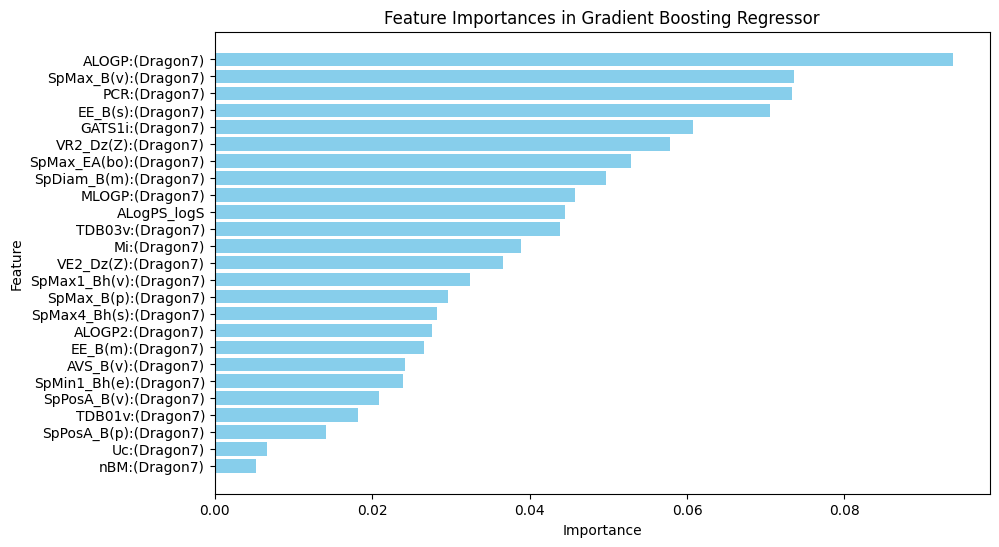

In [34]:
# the importance of selected features
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the best Gradient Boosting Regressor model
feature_importances = best_gbr.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top 10 most important features:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [35]:
# Train model using SVM
from sklearn.svm import SVR

# Initialize and train the SVM model
svm = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm.fit(X_train_normalized, y_train)

y_pred_svm = svm.predict(X_test_normalized)

mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

y_train_pred_svm = svm.predict(X_train_normalized)
train_mse_svm = mean_squared_error(y_train, y_train_pred_svm)
train_rmse_svm = np.sqrt(train_mse_svm)
train_r2_svm = r2_score(y_train, y_train_pred_svm)

print("SVM Model Results")
print(f"Test set Mean Squared Error: {mse_svm}")
print(f"Test set Root Mean Squared Error (RMSE): {rmse_svm}")
print(f"Test set Mean Absolute Error (MAE): {mae_svm}")
print(f"Test set R² Score: {r2_svm}")
print(f"Training set Mean Squared Error (MSE): {train_mse_svm}")
print(f"Training set Root Mean Squared Error (RMSE): {train_rmse_svm}")
print(f"Training set R² Score: {train_r2_svm}")

SVM Model Results
Test set Mean Squared Error: 764.1273194453076
Test set Root Mean Squared Error (RMSE): 27.642852954159917
Test set Mean Absolute Error (MAE): 20.943662248235945
Test set R² Score: 0.30752927033997846
Training set Mean Squared Error (MSE): 1016.6005607710867
Training set Root Mean Squared Error (RMSE): 31.884174142842195
Training set R² Score: 0.23465141778810572


In [36]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the RSVM model
rsvm = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'linear']  # You can adjust the kernels based on your needs
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rsvm, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_normalized, y_train)

best_rsvm = grid_search.best_estimator_

y_pred_rsvm = best_rsvm.predict(X_test_normalized)

mse_rsvm = mean_squared_error(y_test, y_pred_rsvm)
rmse_rsvm = np.sqrt(mse_rsvm)
mae_rsvm = mean_absolute_error(y_test, y_pred_rsvm)
r2_rsvm = r2_score(y_test, y_pred_rsvm)

y_train_pred_rsvm = best_rsvm.predict(X_train_normalized)
train_mse_rsvm = mean_squared_error(y_train, y_train_pred_rsvm)
train_rmse_rsvm = np.sqrt(train_mse_rsvm)
train_r2_rsvm = r2_score(y_train, y_train_pred_rsvm)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test set Mean Squared Error: {mse_rsvm}")
print(f"Test set Root Mean Squared Error (RMSE): {rmse_rsvm}")
print(f"Test set Mean Absolute Error (MAE): {mae_rsvm}")
print(f"Test set R² Score: {r2_rsvm}")
print(f"Training set Mean Squared Error (MSE): {train_mse_rsvm}")
print(f"Training set Root Mean Squared Error (RMSE): {train_rmse_rsvm}")
print(f"Training set R² Score: {train_r2_rsvm}")

best_cv_results = grid_search.cv_results_
best_index = grid_search.best_index_
best_cv_mse = -best_cv_results['mean_test_score'][best_index]
best_cv_rmse = np.sqrt(best_cv_mse)

print(f"Best Cross-Validation Mean Squared Error (MSE): {best_cv_mse}")
print(f"Best Cross-Validation Root Mean Squared Error (RMSE): {best_cv_rmse}")


Best hyperparameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Test set Mean Squared Error: 609.4539306998507
Test set Root Mean Squared Error (RMSE): 24.687120745438314
Test set Mean Absolute Error (MAE): 17.7755074775119
Test set R² Score: 0.4476980506439011
Training set Mean Squared Error (MSE): 490.4767976112075
Training set Root Mean Squared Error (RMSE): 22.146710762801945
Training set R² Score: 0.6307441328039013
Best Cross-Validation Mean Squared Error (MSE): 692.9889890143443
Best Cross-Validation Root Mean Squared Error (RMSE): 26.32468402496684


In [37]:
# Gather the results into a dictionary
results = {
    "Model": ["Random Forest", "Gradient Boosting", "RSVM", "SVM", "Lasso"],
    "Test MSE": [mse_forest, mse_gbr, mse_rsvm, mse_svm, mse_lasso],
    "Test RMSE": [rmse_forest, rmse_gbr, rmse_rsvm, rmse_svm, rmse_lasso],
    "Test MAE": [mae_forest, mae_gbr, mae_rsvm, mae_svm, mae_lasso],
    "Test R²": [r2_forest, r2_gbr, r2_rsvm, r2_svm, r2_lasso],
    "Train MSE": [train_mse_forest, train_mse_gbr, train_mse_rsvm, train_mse_svm, train_mse_lasso],
    "Train RMSE": [train_rmse_forest, train_rmse_gbr, train_rmse_rsvm, train_rmse_svm,train_rmse_lasso],
    "Train R²": [train_r2_forest, train_r2_gbr, train_r2_rsvm, train_r2_svm, train_r2_lasso]
}

df = pd.DataFrame(results)

print(df)


               Model    Test MSE  Test RMSE   Test MAE   Test R²    Train MSE  \
0      Random Forest  510.070916  22.584750  17.289215  0.537761    87.781262   
1  Gradient Boosting  480.863529  21.928601  16.621409  0.564230   161.926282   
2               RSVM  609.453931  24.687121  17.775507  0.447698   490.476798   
3                SVM  764.127319  27.642853  20.943662  0.307529  1016.600561   
4              Lasso  777.449408  27.882780  22.657999  0.295456   956.499331   

   Train RMSE  Train R²  
0    9.369166  0.933914  
1   12.725026  0.878094  
2   22.146711  0.630744  
3   31.884174  0.234651  
4   30.927323  0.279899  


In [38]:
# Predict on the validation set
y_val_pred = best_gbr.predict(X_val_normalized)

print("Predicted values for the validation set:")
print(y_val_pred)


Predicted values for the validation set:
[ 75.2549981   25.62766112  37.55450574  39.1067292   25.62766112
  67.98987838  73.78590145  78.01299717  18.21202989  29.65552459
  39.9907091   60.65581095   6.69337829  38.12926246  50.82174618
  47.90077376   6.88704539  25.18582904  63.32888263  32.56447046
  48.32651087  58.54919205  58.89291634   9.59519834   7.62792039
  69.6787533   54.56108182  70.23975188  63.28415549  23.19598258
   4.95410438  52.48178122  39.54032926  81.60992794  60.51950985
  94.49328287  87.50451542  26.34474665  49.11010935   7.96364784
  27.42157978   9.17870108  47.64744303  66.23064926  78.45501123
  63.2706393   64.03959146  43.62194045  63.09597521  62.45128566
  41.31114288  18.52041324  40.05792917  10.15393423  13.46874305
  61.30378946  26.89188049  15.44049977  49.89827962  17.73810536
  89.45860826  75.62480064  82.38665546  61.84199081  32.08259894
  61.76935688  30.93195317  23.76634563  62.09441277  21.66387034
  33.44705617  40.99077429  68.9597

In [39]:
# Calculate R² for val data
r2 = r2_score(y_val, y_val_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Calculate MSE
mse = mean_squared_error(y_val, y_val_pred)

# Calculate MAE
mae = mean_absolute_error(y_val, y_val_pred)
# Output the results
print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE:{mae}')


R²: 0.5395568686630297
RMSE: 24.275708174968013
MSE: 589.3100073962088
MAE:17.995926856702404


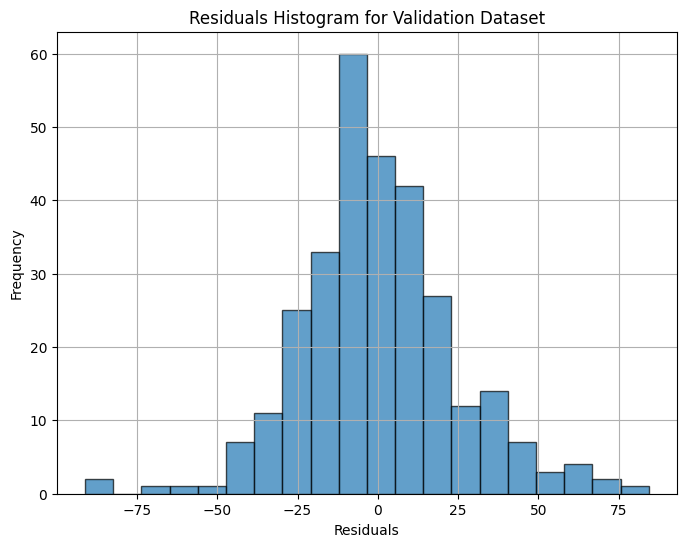

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 
# Calculating residuals
residuals = y_val - y_val_pred

# Plot residuals histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram for Validation Dataset')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [41]:
X_train.head()

,ALogPS_logS,Mi:(Dragon7),nBM:(Dragon7),PCR:(Dragon7),VE2_Dz(Z):(Dragon7),VR2_Dz(Z):(Dragon7),SpDiam_B(m):(Dragon7),EE_B(m):(Dragon7),AVS_B(v):(Dragon7),SpPosA_B(v):(Dragon7),...,SpMax1_Bh(v):(Dragon7),SpMax4_Bh(s):(Dragon7),SpMin1_Bh(e):(Dragon7),SpMax_EA(bo):(Dragon7),TDB01v:(Dragon7),TDB03v:(Dragon7),Uc:(Dragon7),MLOGP:(Dragon7),ALOGP:(Dragon7),ALOGP2:(Dragon7)
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1(C)[C@@H]2C[C@H]1C(=C)CC2,-3.33,1.128,1,1.034,0.273,1.067,5.298,4.390,3.350,1.274,...,3.978,3.467,2.057,3.696,0.796,1.177,1.000,3.374,2.927,8.566
COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,-5.40,1.112,13,1.358,0.190,1.025,5.680,5.523,3.395,1.282,...,3.882,4.648,1.900,3.902,0.937,1.695,3.807,3.660,5.001,25.010
CCCCCCCCCCCCCC(=O)OCC(O)CO,-4.09,1.144,1,1.015,0.199,0.932,4.552,4.983,2.946,1.185,...,3.703,4.394,1.832,2.839,0.698,0.841,1.000,3.806,4.656,21.680
CCCCCCCCC\C=C\CC1CC(=O)OC1=O,-5.73,1.134,3,1.116,0.209,0.976,4.875,4.989,3.133,1.238,...,3.762,4.260,1.832,3.295,0.758,0.944,2.000,4.586,4.891,23.920
CCC\C=C\C=O,-1.49,1.134,2,1.168,0.345,0.815,4.380,3.985,2.972,1.245,...,3.611,3.152,1.737,2.376,0.699,0.808,1.585,1.335,1.830,3.348


In [42]:
# Save result to csv file
train_results = pd.DataFrame({
    # 'SMILES': X_train.index,
    'Set': 'Training',
    'Actual': y_train,
    'Predicted': y_train_pred_gbr
})
# Reset index
train_results = train_results.reset_index()
train_results = pd.merge(train_results, X_train, on="SMILES", how='left')
# print(train_results.shape)

test_results = pd.DataFrame({
    # 'SMILES': X_test.index,
    'Set': 'Test',
    'Actual': y_test,
    'Predicted': y_pred_gbr
})
test_results = test_results.reset_index()
test_results = pd.merge(test_results, X_test, on="SMILES", how='left')

val_results = pd.DataFrame({
    # 'SMILES': X_val.index,
    'Set': 'Validation',
    'Actual': y_val,  # Validation set might not have actual values
    'Predicted': y_val_pred
})
val_results = val_results.reset_index()
val_results = pd.merge(val_results, X_val, on="SMILES", how='left')

# Combine all results
all_results = pd.concat([train_results, test_results, val_results])
all_results.head()
# Save to CSV
all_results.to_csv('gbr_all_results_with_variables.csv', index=False)

print("Results have been saved to 'gbr_all_results_with_variables.csv'.")

Results have been saved to 'gbr_all_results_with_variables.csv'.


In [43]:
import numpy as np

all_results['Residual'] = all_results['Actual'] - all_results['Predicted']

residual_std = all_results[~all_results['Actual'].isna()]['Residual'].std()

all_results['Standardized_Residual'] = all_results['Residual'] / residual_std

def classify_prediction(sr):
    if pd.isna(sr):
        return 'Unknown'
    elif abs(sr) <= 2:
        return 'Good'
    else:
        return 'Bad'

all_results['Prediction_Quality'] = all_results['Standardized_Residual'].apply(classify_prediction)

all_results.to_csv('gbr_results_with_standardized_residuals.csv', index=False)
print("Standardized residuals added. File saved as 'gbr_results_with_standardized_residuals.csv'.")


Standardized residuals added. File saved as 'gbr_results_with_standardized_residuals.csv'.


In [44]:
# # Merge table
# iupac_df = pd.read_excel("C:/Users/zth3/OneDrive - CDC/QSAR_TOX24/data_for_wining_team/jupyter_notebook/SMILES_activity_IUPACname.xlsx")  

# iupac_df = iupac_df[['SMILES', 'IUPAC Name']]

# merged_df = pd.merge(iupac_df, all_results, on='SMILES', how='left')

# merged_df.to_csv("gbr_final_results_with_IUPAC.csv", index=False)

# print("Final merged results saved as 'gbr_final_results_with_IUPAC.csv'.")


## Applicability Domain

In [45]:
!pip install pandas==2.0.3 scipy==1.10.1
!pip install pyADAqsar


In [46]:
!pip install pyADAqsar

In [47]:
from pyADA import LeverageAD
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
lv = LeverageAD()

ad_test = lv.fit(X_train=X_train, X_target=X_test)
ad_test_df = pd.DataFrame(ad_test).T
ad_test_df.columns = ['Leverage', 'In_AD']
ad_test_df.index = X_test.index

from pyADA import LeverageAD
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

test_with_ad = X_test.copy()
test_with_ad['Leverage'] = ad_test_df['Leverage']
test_with_ad['In_AD'] = ad_test_df['In_AD']
test_with_ad['True_Activity'] = y_test.values
test_with_ad['Predicted_Activity'] = y_pred_forest

val_with_ad = X_val.copy()
val_with_ad['Leverage'] = ad_val_df['Leverage']
val_with_ad['In_AD'] = ad_val_df['In_AD']
val_with_ad['True_Activity'] = y_val.values
val_with_ad['Predicted_Activity'] = best_forest.predict(X_val_normalized)


test_with_ad.to_csv('Tox24_test_AD_results.csv')
val_with_ad.to_csv('Tox24_validation_AD_results.csv')

print("Test Set - Within AD: {:.2f}%".format(test_with_ad['In_AD'].mean() * 100))
print("Validation Set - Within AD: {:.2f}%".format(val_with_ad['In_AD'].mean() * 100))

fig_test = lv.plotLeverages(X_train=X_train, X_targets=X_test)
plt.title('Williams Plot - Test Set')
plt.show()

fig_val = lv.plotLeverages(X_train=X_train, X_targets=X_val)
plt.title('Williams Plot - Validation Set')
plt.show()

NameError: name 'ad_val_df' is not defined

In [ ]:
# from pyADA import LeverageAD
df = pd.read_excel('C:/Users/zth3/OneDrive - CDC/QSAR_TOX24/data/data_used/Tox24 SMILES_activity_IUPACname.xlsx',sheet_name='Tox24 dataset')
df = df.drop(columns = ['SMILES','activity','SMILES.1','Predicted','Residual','Standardized Residual','Prediction Quality'])
df_cleaned = df.dropna()
df_cleaned_train = df_cleaned[df_cleaned['Set']=='Training']
df_cleaned_tr_r = df_cleaned_train.drop(columns = ['IUPAC Name','Set'])
df_cleaned_tr_r.head()
df_cleaned_test = df_cleaned[df_cleaned['Set']=='Test']
df_cleaned_te_r = df_cleaned_test.drop(columns = ['IUPAC Name','Set'])
df_cleaned_validation = df_cleaned[df_cleaned['Set']=='Validation']
df_cleaned_va_r = df_cleaned_validation.drop(columns = ['IUPAC Name','Set'])
df_cleaned_tr_r.head()

#print(df_cleaned_va_r.head(5))
#print(np.unique(df_cleaned['Set']))

# lv = LeverageAD()
# df_ad = lv.fit(X_train=df_cleaned_tr_r, X_target=df_cleaned_te_r)
# df_ad_df = pd.DataFrame(df_ad)
# df_ad_df = df_ad_df.T
# df_ad_df.index = df_cleaned_test.index
# df_ad_df.columns = ['Leverage', 'Applicability domain']

# df_cleaned_test['Leverage'] = df_ad_df['Leverage']
# df_cleaned_test['Applicability domain'] = df_ad_df['Applicability domain']
# df_cleaned_test.to_csv('test_AD.csv')
# fig = lv.plotLeverages(X_train=df_cleaned_tr_r, X_targets=df_cleaned_te_r)
# fig.show()

# df_ad = lv.fit(X_train=df_cleaned_tr_r, X_target=df_cleaned_va_r)
# df_ad_df = pd.DataFrame(df_ad)
# df_ad_df = df_ad_df.T
# df_ad_df.index = df_cleaned_validation.index
# df_ad_df.columns = ['Leverage', 'Applicability domain']

# df_cleaned_validation['Leverage'] = df_ad_df['Leverage']
# df_cleaned_validation['Applicability domain'] = df_ad_df['Applicability domain']
# df_cleaned_validation.to_csv('validation_AD.csv')
# fig = lv.plotLeverages(X_train=df_cleaned_tr_r, X_targets=df_cleaned_va_r)
# fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zth3/OneDrive - CDC/QSAR_TOX24/data/data_used/Tox24 SMILES_activity_IUPACname.xlsx'

In [ ]:
X_train_withSMILES.head()

,SMILES,GATS1i,P_VSA_MR_5,Eig12_EA(bo),Eig13_EA(bo),Eig14_EA(bo),Eig15_EA(bo),DISPm,DISPs,TDB04v,...,nSO3OH,C-006,C-026,O-057,NsssCH,CATS2D_08_NL,B06[C-S],B08[C-S],ALOGP,DLS_02
0,CC1(C)[C@@H]2C[C@H]1C(=C)CC2,1.204,25.250,0.000,0.000,0.000,0.000,1.458,0.132,0.878,...,0,0,0,0,2,0,0,0,2.927,0.50
1,COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,1.223,8.825,-0.620,-0.672,-1.217,-1.500,14.260,0.304,2.116,...,0,0,5,0,1,0,0,0,5.001,1.00
2,CCCCCCCCCCCCCC(=O)OCC(O)CO,1.576,43.830,-0.620,-1.000,-1.154,-1.399,13.060,1.393,1.047,...,0,2,0,0,1,0,0,0,4.656,0.83
3,CCCCCCCCCC=CCC1CC(=O)OC1=O,1.423,34.170,-0.906,-1.104,-1.487,-1.701,17.910,1.511,1.156,...,0,0,0,0,1,0,0,0,4.891,0.67
4,CCC/C=C/C=O,1.417,13.890,0.000,0.000,0.000,0.000,8.253,0.843,0.981,...,0,0,0,0,0,0,0,0,1.830,0.83


In [ ]:
# Convert X_train, X_test, and X_val to include SMILES as a column and reset index
X_train_withSMILES = X_train.reset_index() 
X_test_withSMILES = X_test.reset_index()  
X_val_withSMILES = X_val.reset_index()     
X_val_withSMILES.head()

,SMILES,GATS1i,P_VSA_MR_5,Eig12_EA(bo),Eig13_EA(bo),Eig14_EA(bo),Eig15_EA(bo),DISPm,DISPs,TDB04v,...,nSO3OH,C-006,C-026,O-057,NsssCH,CATS2D_08_NL,B06[C-S],B08[C-S],ALOGP,DLS_02
0,CC(OC1=C(C)C=C(Cl)C=C1)C(O)=O,1.193,17.650,-1.946,-2.230,-3.0,0.0,9.748,0.502,1.728,...,0,0,2,1,1,0,0,0,3.011,1.00
1,CC(C)=CCC/C(/C)=C/CO,1.374,31.550,0.000,0.000,0.0,0.0,3.002,0.427,1.001,...,0,1,0,0,0,0,0,0,2.934,0.83
2,CC(CN1C[C@H](C)O[C@H](C)C1)CC2=CC=C(C=C2)C(C)(C)C,1.497,64.930,-0.580,-0.978,-1.0,-1.0,0.999,0.039,1.179,...,0,3,0,0,3,0,0,0,4.843,1.00
3,COC1=CC=C(/C=C/C)C=C1,1.186,8.825,0.000,0.000,0.0,0.0,3.712,0.220,1.559,...,0,0,1,0,0,0,0,0,2.768,0.83
4,CC(C)=CCC/C(/C)=C\CO,1.374,31.550,0.000,0.000,0.0,0.0,3.633,0.401,1.025,...,0,1,0,0,0,0,0,0,2.934,0.83


In [ ]:
X_train_withoutSMILES = X_train_withSMILES.drop(columns=['SMILES'])  # Drop the SMILES column

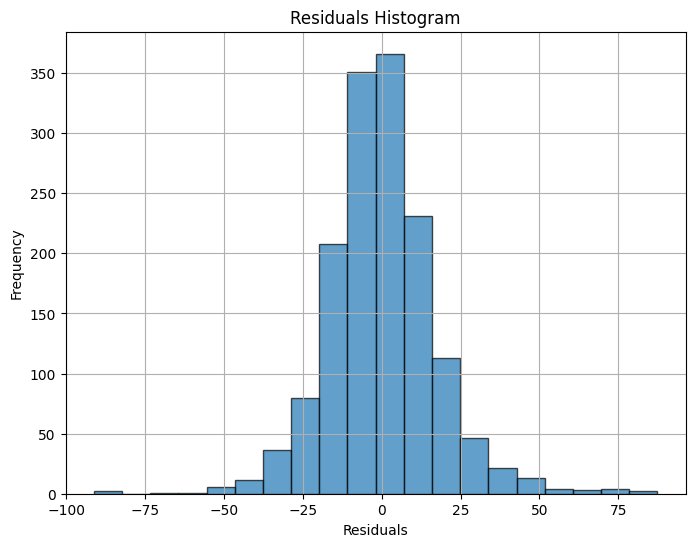

In [48]:
plt.figure(figsize=(8,6))
plt.hist(all_results['Residual'], bins=20, edgecolor='k',alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()